In [ ]:
import pandas as pd  #importing all neccessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.datasets
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import metrics

In [14]:
house_price_dataset = pd.read_csv('data.csv')   # uploading the dataset

In [15]:
print(house_price_dataset)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [17]:
house_price_dataframe = pd.DataFrame(house_price_dataset)

In [20]:
print(house_price_dataframe)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [21]:
house_price_dataframe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [22]:
house_price_dataframe.isnull().sum()   # checking for null values in the dataset

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [25]:
house_price_dataframe.shape

(4600, 18)

In [28]:
house_price_dataframe.drop(columns='date', axis=1, inplace=True) #droping the date column

In [29]:
house_price_dataframe.shape

(4600, 17)

In [35]:
correlation = house_price_dataframe.select_dtypes(include='number').corr()

# Select only numerical columns before calculating the correlation.

In [36]:
print(correlation)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

<Axes: >

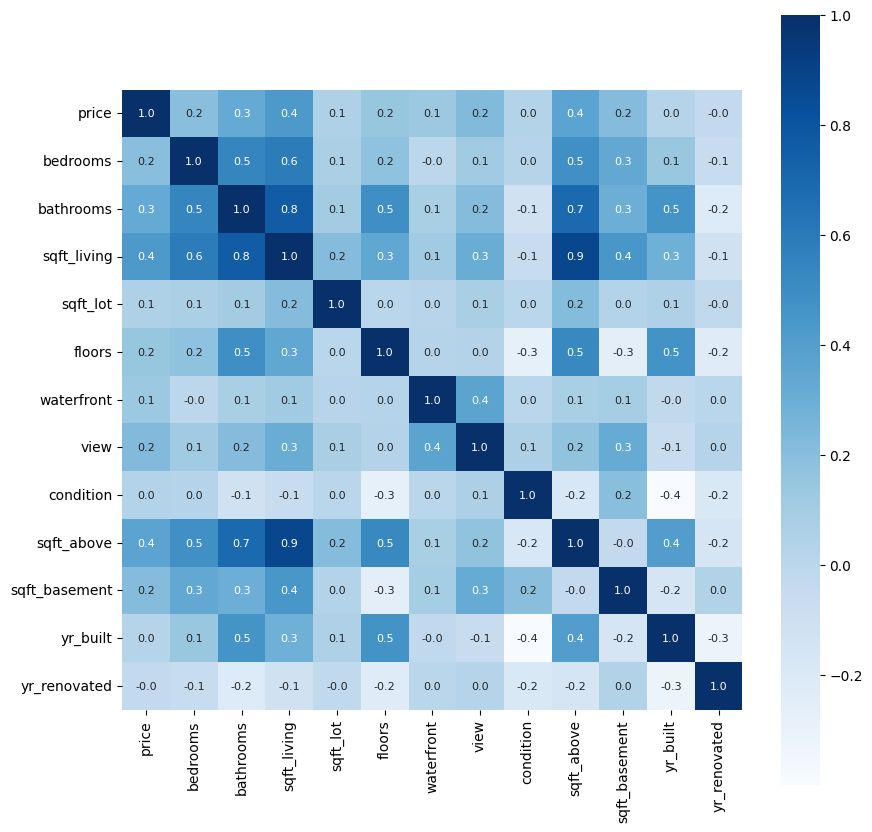

In [39]:
plt.figure(figsize=(10,10))  # representation of correlation using heatmap
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [41]:
X=house_price_dataframe.drop('price',axis=1)
Y=house_price_dataframe['price']

In [42]:
print(X)
print(Y)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [45]:
X_train,Y_train,X_test,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)   # splliting the datset for training

In [49]:
print(X_train,Y_train,X_test,Y_test)
X


      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
2274       3.0       1.75         1730      8400     1.0           0     0   
2735       3.0       1.00          990     10723     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
133        2.0       2.50         2220      4000     2.0           0     0   
1903       3.0       2.00         1710      7225     2.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
3335       6.0       2.00         1900      8240     1.0           0     0   
1099       2.0       1.00         1030      4841     1.0           0     0   
2514       3.0       2.00         1510      6710     1.0           0     0   
3606       4.0       2.00         1350       942     3.0           0     0   
2575       5.0       2.50         2640      7096     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

In [53]:
X_train,Y_train,X_test,Y_test.shape

(      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 2274       3.0       1.75         1730      8400     1.0           0     0   
 2735       3.0       1.00          990     10723     1.0           0     0   
 4          4.0       2.50         1940     10500     1.0           0     0   
 133        2.0       2.50         2220      4000     2.0           0     0   
 1903       3.0       2.00         1710      7225     2.0           0     0   
 ...        ...        ...          ...       ...     ...         ...   ...   
 3335       6.0       2.00         1900      8240     1.0           0     0   
 1099       2.0       1.00         1030      4841     1.0           0     0   
 2514       3.0       2.00         1510      6710     1.0           0     0   
 3606       4.0       2.00         1350       942     3.0           0     0   
 2575       5.0       2.50         2640      7096     2.0           0     0   
 
       condition  sqft_above  sqft_basement  yr_bu

In [51]:
model=XGBRegressor()  # calling the predicting model

In [54]:
model.fit(X_train, Y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:street: object, city: object, statezip: object, country: object

In [58]:
house_price_dataframe.info

<bound method DataFrame.info of              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3        1340              0      1955   
1              0     4          5        3370            280      1921   
2              0     0          4        1930              0      1966   
3              0     0          4        1000           1000      1963   
4              0     0          4        1140            800      1976   
...          ...   ...        ...         ...            ...       ...   
4595           0     0          4        1510              0      1954   
4596           0     0          3        1460              0      1983   
4597           0     0          3        3010              0      2009   
4598           0     0          3        1070           1020      1974   
4599           0     0          4        1490              0      1990   

      yr_renovated                    street       city  statezip country  
0             2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1                0           709 W Blaine St    Seattle  WA 98119     USA  
2                0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3                0           857 170th Pl NE   Bellevue  WA 98008     USA  
4             1992         9105 170th Ave NE    Redmond  WA 98052     USA  
...            ...                       ...        ...       ...     ...  
4595          1979            501 N 143rd St    Seattle  WA 98133     USA  
4596          2009          14855 SE 10th Pl   Bellevue  WA 98007     USA  
4597             0          759 Ilwaco Pl NE     Renton  WA 98059     USA  
4598             0         5148 S Creston St    Seattle  WA 98178     USA  
4599             0         18717 SE 258th St  Covington  WA 98042     USA  

[4600 rows x 17 columns]>

In [69]:
X_train.drop(columns=['city','country'],axis=1,inplace= True)

In [70]:
Y_train.drop(columns=['country','street'],axis=1,inplace=True)

In [71]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
2274,3.0,1.75,1730,8400,1.0,0,0,4,1400,330,1980,0,WA 98052
2735,3.0,1.00,990,10723,1.0,0,0,5,990,0,1960,0,WA 98059
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052
133,2.0,2.50,2220,4000,2.0,0,0,3,2220,0,2000,0,WA 98112
1903,3.0,2.00,1710,7225,2.0,0,0,4,1710,0,1988,0,WA 98023


In [72]:
Y_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
4111,3.0,1.50,1460,15000,1.0,0,0,3,1460,0,1966,1963,WA 98001
1996,4.0,1.75,1560,31299,1.0,0,0,4,1560,0,1965,0,WA 98092
2307,5.0,2.50,2340,6000,2.0,0,0,4,2340,0,1922,0,WA 98144
3607,2.0,1.75,1110,1773,2.0,0,0,3,1110,0,2014,0,WA 98108
1519,4.0,2.50,2798,4473,2.0,0,0,3,2798,0,2012,1912,WA 98055


In [73]:
X_train.drop(columns='statezip',axis=1,inplace=True)

In [74]:
Y_train.drop(columns='statezip',axis=1,inplace=True)

In [75]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
2274,3.0,1.75,1730,8400,1.0,0,0,4,1400,330,1980,0
2735,3.0,1.00,990,10723,1.0,0,0,5,990,0,1960,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
133,2.0,2.50,2220,4000,2.0,0,0,3,2220,0,2000,0
1903,3.0,2.00,1710,7225,2.0,0,0,4,1710,0,1988,0


In [76]:
Y_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
4111,3.0,1.50,1460,15000,1.0,0,0,3,1460,0,1966,1963
1996,4.0,1.75,1560,31299,1.0,0,0,4,1560,0,1965,0
2307,5.0,2.50,2340,6000,2.0,0,0,4,2340,0,1922,0
3607,2.0,1.75,1110,1773,2.0,0,0,3,1110,0,2014,0
1519,4.0,2.50,2798,4473,2.0,0,0,3,2798,0,2012,1912


In [77]:
model.fit(X_train,Y_train)  # training the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
prediction_on_training_data=model.predict(X_train)

In [79]:
print(prediction_on_training_data)

[[  678.25854    148.86723   1172.1765  ]
 [13503.64       193.74019     63.716698]
 [  647.6512      82.89704   2104.6333  ]
 ...
 [12677.708      457.81726    841.8795  ]
 [  338.1427      82.33438   1358.5713  ]
 [  241.80713   1286.9783    1885.2606  ]]


In [85]:
score_1=metrics.r2_score(Y_train,prediction_on_training_data)

TypeError: too many positional arguments

In [84]:
print(Y_train.shape)
print(prediction_on_training_data.shape)

(920, 12)
(3680, 3)


In [87]:

prediction_on_training_data = prediction_on_training_data.reshape(Y_train.shape)
##reshaping the data because of unmatching values


In [88]:
print(Y_train.shape)
print(prediction_on_training_data.shape)

(920, 12)
(920, 12)


In [89]:
score_1=metrics.r2_score(Y_train,prediction_on_training_data)

In [90]:
print(score_1)

-5004545.626670297


In [92]:
score_2=metrics.mean_absolute_error(Y_train,prediction_on_training_data)

In [95]:
print('mean absolute error:',score_2)          # the accuracy values in the form of rsquared and MAE score
print('r sqared measure score:',score_1)

mean absolute error: 899.5723141708804
r sqared measure score: -5004545.626670297
